# Lucia Depaoli
# 2016960

In [1]:
library(polyqtlR)
library(ggplot2)
library(GoFKernel)

Warning message:
"package 'polyqtlR' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'GoFKernel' was built under R version 3.6.3"Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


# Ex 1

### 1.1
A set of measurements have been performed on the concentration of a contaminant in tap water. The following tables reports a set of values (x), with the corresponding probabilities given by the two methods (p1 and p2).

In [2]:
x <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

### 1.2
Evaluate the expected values, E[X], and the variance, Var(X), for both methods.

In [3]:
expected <- function(x,p) {
    sum(x*p)/sum(p)
}

cat('The expected value with p1 method: ',weighted.mean(x,p1),'\n')
cat('The expected value with p2 method: ',weighted.mean(x,p2),'\n')

cat('The expected value with p1 method: ',expected(x,p1),'\n')
cat('The expected value with p2 method: ',expected(x,p2),'\n')

The expected value with p1 method:  15.959 
The expected value with p2 method:  15.9622 
The expected value with p1 method:  15.959 
The expected value with p2 method:  15.9622 


In [4]:
var <- function(x,p) {
    sum(p* (x - weighted.mean(x))**2)
}

cat('The expected value with p1 method: ',var(x,p1),'\n')
cat('The expected value with p2 method: ',var(x,p2),'\n')

The expected value with p1 method:  0.033988 
The expected value with p2 method:  0.0282056 


# Ex 2

### 2.1
Simulate the waiting time for 50 people at the doctor's office and plot the relative histogram.

In [5]:
lambda <- 1/30
simul <- rexp(1:50, lambda)
time <- cumsum(simul)
people <- 1:50

# hist(simul, breaks=40, xlim=c(0,150), col='firebrick', xlab="Waiting time [m]", 
#      ylab="# people", main="Simulation of waiting time of 50 people" )

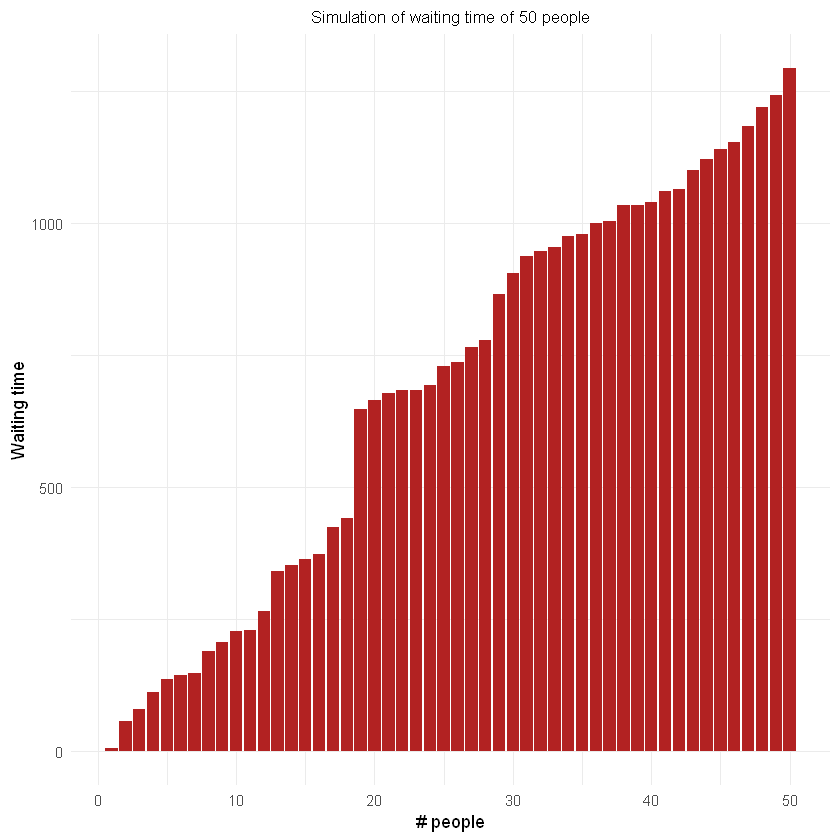

In [6]:
df <- data.frame(time,people)

ggplot(df, aes(x=people, y=time)) +
  geom_bar(stat="identity", fill='firebrick') + labs(y='Waiting time', x='# people',
       title = "Simulation of waiting time of 50 people") + theme_minimal() +
    ggtitle("Simulation of waiting time of 50 people")+
    theme(plot.title = element_text(hjust = 0.5, size=10))

### 2.2
What is the probability that a person will wait for less than 10 minutes?

In [7]:
cat('Probability that a person will wait for less than 10 minutes: ',pexp(10,lambda)*100)

Probability that a person will wait for less than 10 minutes:  28.34687

### 2.3
Evaluate the average waiting time from the simulated data and compare it with the expected value.

In [8]:
cat('Average waiting time from the simulated data: ', mean(rexp(people,lambda)),'\n')
cat('Average waiting time expected value: ', 1/lambda)

Average waiting time from the simulated data:  25.45876 
Average waiting time expected value:  30

### 2.4
What is the probability for waiting more than one hour before being received?

In [9]:
cat('Probability that a person will wait for more than 60 minutes: ',(1 - pexp(60,lambda)) * 100)

Probability that a person will wait for more than 60 minutes:  13.53353

# Ex 3

### 3.1
Let's suppose that on a book, on average, there is one typo error every three pages. If the number of errors follows a Poisson distribution, plot the pdf and cdf, and calculate the probability that there is at least one error on a specific page of the
book.

In [10]:
lambda <- 1/3
x <- 0:6

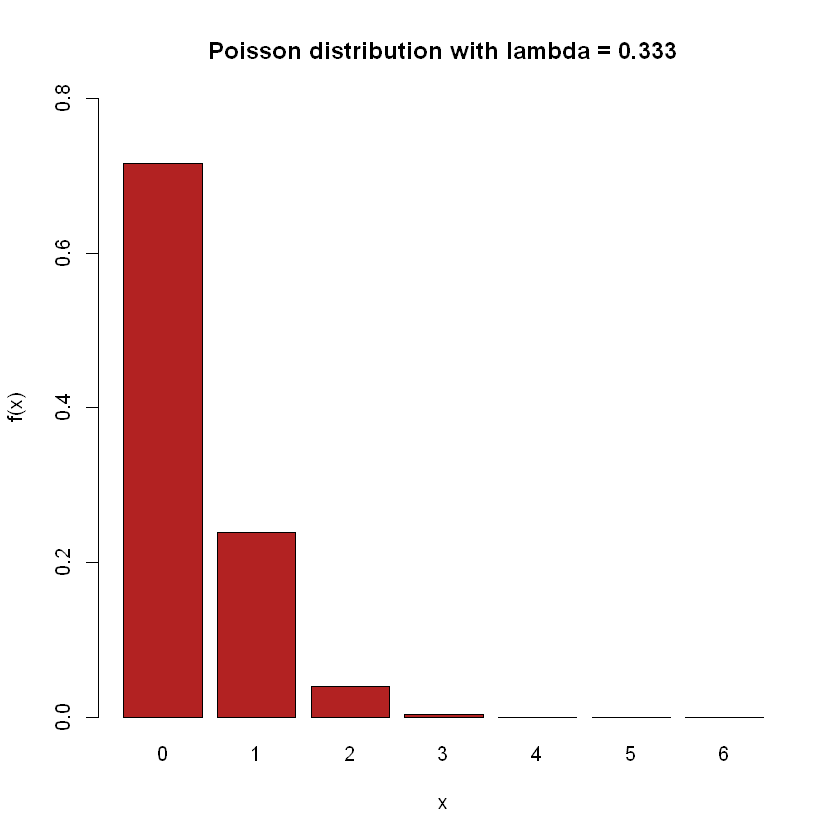

In [11]:
barplot(dpois(x,lambda), names=x, col='firebrick', xlab='x', ylab='f(x)',
ylim=c(0,0.8),main = sprintf("Poisson distribution with lambda = %.3f",lambda))

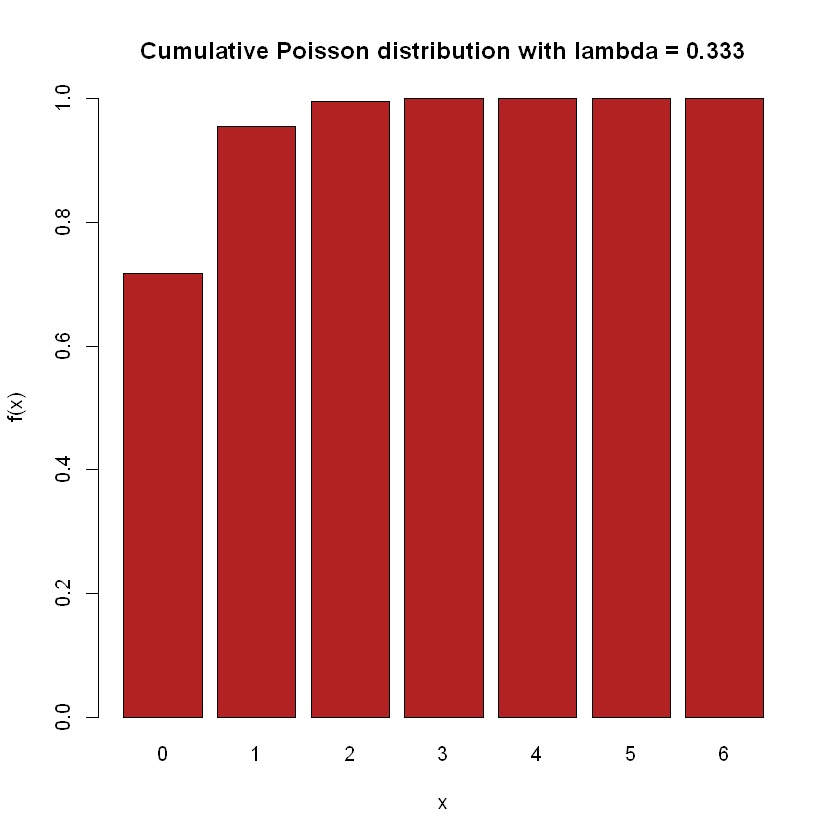

In [12]:
barplot(ppois(x,lambda), names=x, col='firebrick', xlab='x', ylab='f(x)',ylim=c(0,1),
        main = sprintf("Cumulative Poisson distribution with lambda = %.3f",lambda))

In [13]:
cat('Probability that there is at least one error on a page of the book: ',(1 - ppois(0,lambda)) * 100,'\n')

Probability that there is at least one error on a page of the book:  28.34687 


# Ex 4

We randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. Calculate the probability that at least 10 draws are needed.

In [14]:
noprob <- 48/52

cat('Probability to need at least 10 drawn for pick up an ace: ', (1 - noprob^10)*100)

Probability to need at least 10 drawn for pick up an ace:  55.08629

# Ex 5

The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form:

In [15]:
pdf <- function(x, c = 1) {
    ifelse(x > 1 & x < 2,
          c * (x - 1) * (2 - x),
          0)
}

### 5.1
Using the integrate() R function, determine the constant c (and verify it analytically).

In [16]:
c <- 1 / integrate(pdf, 1, 2)$value
cat('Value of c: ',c)

Value of c:  6

### 5.2
Write the set of four R functions and plot the pdf and cdf, respectively.

In [17]:
pdf <- function(x, c = 6) {
    ifelse(x > 1 & x < 2,
          c * (x - 1) * (2 - x),
          0)
}

cdf <- function(x,c = 6) {
        ifelse(x > 1 & x < 2, 
              c * (3* (x^2)/2 - (x^3)/3 - 2*x) + 5,
               ifelse(x <= 1,
                     0,
                     1)
    )
    }

qdf <- Vectorize(inverse(cdf,lower=1, upper=2))

rdf <- function(x){
    return (qdf(runif(x)))
}

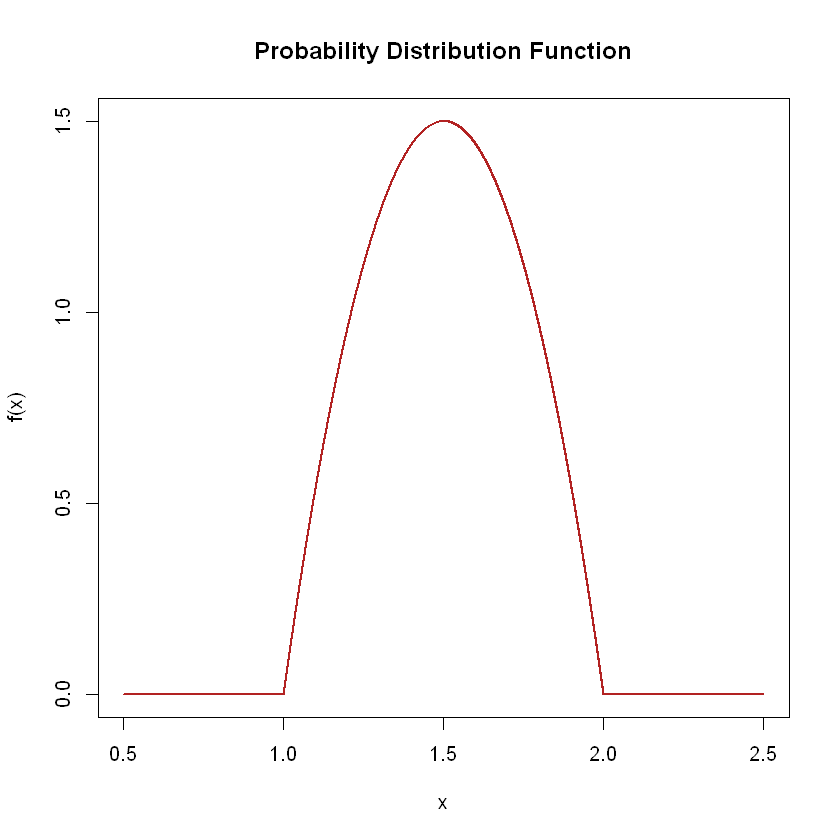

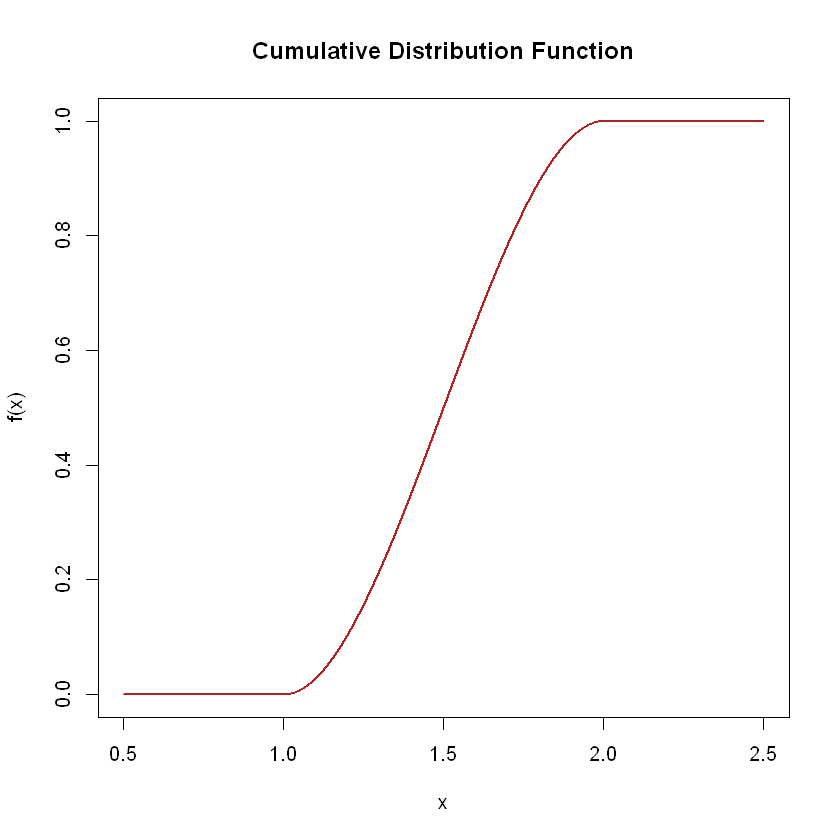

In [18]:
x <- seq(0.5, 2.5, 0.0001)
plot(x, pdf(x), xlab="x" , ylab="f(x)" ,main='Probability Distribution Function',
     col='firebrick', ylim=c(0,1.5), type='l', lwd=2)
plot(x, cdf(x), xlab="x" , ylab="f(x)" ,main='Cumulative Distribution Function',
     col='firebrick', ylim=c(0,1), type='l', lwd=2)

### 5.3
Evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take 90 and 120 minutes.

In [19]:
cat('Probability to take more than 75 minutes to do the exam: ', (1 - cdf(75/60))*100,'\n')
cat('Probability to take between 90 minutes and 120 minutes to do the exam: ', (cdf(120/60) - cdf(90/60))*100,'\n')

Probability to take more than 75 minutes to do the exam:  84.375 
Probability to take between 90 minutes and 120 minutes to do the exam:  50 


# Ex 6

The lifetime of tires sold by an used tires shop is $10^4$x km, where x is a random variable following the distribution function.

In [20]:
lambda = 1/10^4

### 6.1
Write the set of four R functions and plot the pdf and cdf, respectively.

In [21]:
pdf <- function(x) {
    ifelse(x>1 & x<2,
          2/x^2,
          0)
}

cdf <- function(x) {
    ifelse(x>1 & x<2,
            2 - 2/x,
          ifelse(x <=1,
                0,
                1))
}

qdf <- Vectorize(inverse(cdf,lower=1, upper=2))

rdf <- function(x){
    return (qdf(runif(x)))
}

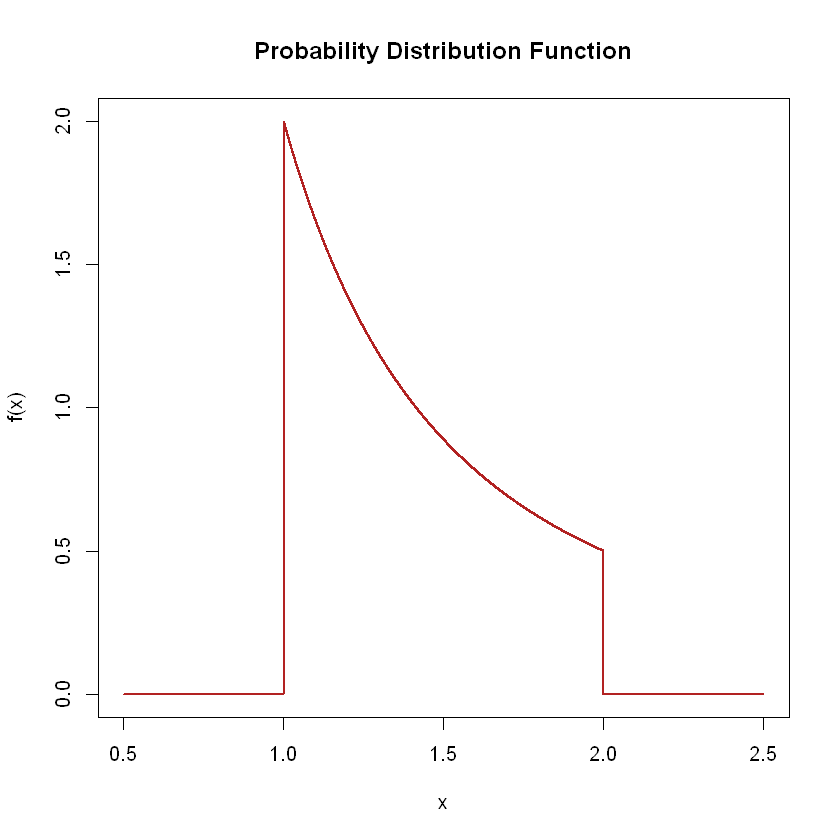

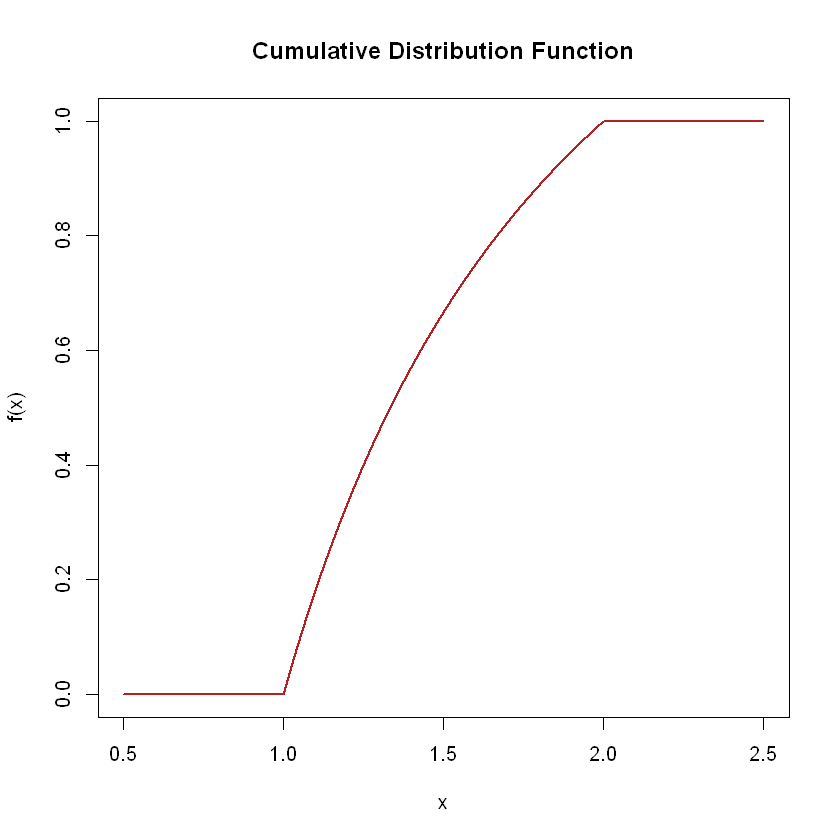

In [22]:
x <- seq(0.5, 2.5, 0.0001)
plot(x, pdf(x), xlab="x" , ylab="f(x)" ,main='Probability Distribution Function',
     col='firebrick', ylim=c(0,2), type='l', lwd=2)
plot(x, cdf(x), xlab="x" , ylab="f(x)" ,main='Cumulative Distribution Function',
     col='firebrick', ylim=c(0,1), type='l', lwd=2)

### 6.2
Determine the probability that tires will last less than 15000 km.

In [23]:
cat('Probability that tires will last less than 15000 km: ', (cdf(15000*lambda))*100,'\n')

Probability that tires will last less than 15000 km:  66.66667 


### 6.3
Sample 3000 random variables from the distribution and determine the mean value
and the variance, using the expression Var(X) = E[$x^2$] - E$[x]^2$

In [24]:
rand <- rdf(3000)

cat('Mean value: ',mean(rand),'\n')
cat('Variance: ',mean(rand^2) - mean(rand)^2,'\n')

Mean value:  1.385926 
Variance:  0.07712922 
